# Diwali Sales Analysis Project

## Overview

The Diwali Sales Analysis Project is aimed at analyzing sales data from a Diwali sales event to extract insights regarding sales performance, customer behavior, and product popularity. Through this analysis, we seek to understand trends, preferences, and factors influencing sales during the Diwali festival.

## Data Source

The dataset used for this analysis is sourced from a CSV file named "Diwali Sales Data.csv". This dataset encompasses details of sales transactions, including customer demographics, product information, order status, and sales amounts.


In [1]:
### Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = 'unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.shape

(11251, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


## Data Preprocessing

In [5]:
df.drop(['Status','unnamed1'],axis =1, inplace =  True)

In [6]:
df.isnull().sum() ### check of null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
# drop null values
df.dropna(inplace = True)

In [8]:
# add group for age 

age_groups = []
for age in df['Age']:
    if age <= 17:
        age_group = '0-17'
    elif age <= 25:
        age_group = '18-25'
    elif age <= 35:
        age_group = '26-35'
    elif age <= 45:
        age_group = '36-45'
    elif age <= 50:
        age_group = '46-50'
    elif age <= 55:
        age_group = '51-55'
    else:
        age_group = '55+'
    age_groups.append(age_group)
    
df['Age Group'] = age_groups

In [9]:
df['Age Group'].value_counts()

26-35    4563
36-45    2261
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: Age Group, dtype: int64

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age Group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,26-35


In [11]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Age Group            object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age               11239 non-null  int64  
 5   Marital_Status    11239 non-null  int64  
 6   State             11239 non-null  object 
 7   Zone              11239 non-null  object 
 8   Occupation        11239 non-null  object 
 9   Product_Category  11239 non-null  object 
 10  Orders            11239 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Age Group         11239 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [13]:
# change data types of Amount
df['Amount'] = df['Amount'].astype(int)
df['Amount'].dtypes

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age Group'],
      dtype='object')

In [15]:
df.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
Age Group              7
dtype: int64

In [16]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
Age Group           0
dtype: int64

In [17]:
df.shape

(11239, 13)

**Number of rows** - 11239

**Number of columns** - 13

In [18]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Data Visualization 

## Distribution and Total Sales by Product Category
**conclusion**
- In product sales, food has the highest sales, followed by clothing & apparel, electronics & gadgets, and footwear and shoes

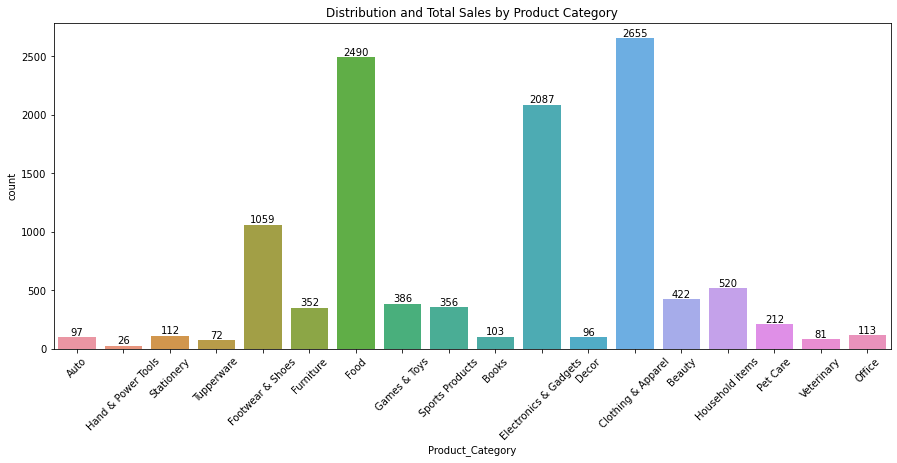

In [19]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution and Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

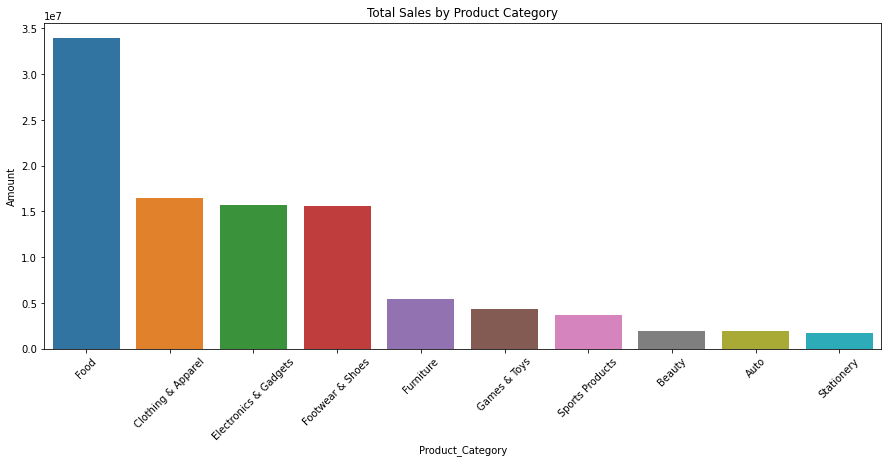

In [20]:
sales_product_category=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

plt.figure(figsize=(15,6))
sns.barplot(x='Product_Category',y='Amount',data = sales_product_category)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

### Total Orders and Total Sales by State
**conclusions**
- Most of the orders and sales are from Uttar Pradesh, Maharashtra, and Karnataka

In [21]:
# top 10 states
df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


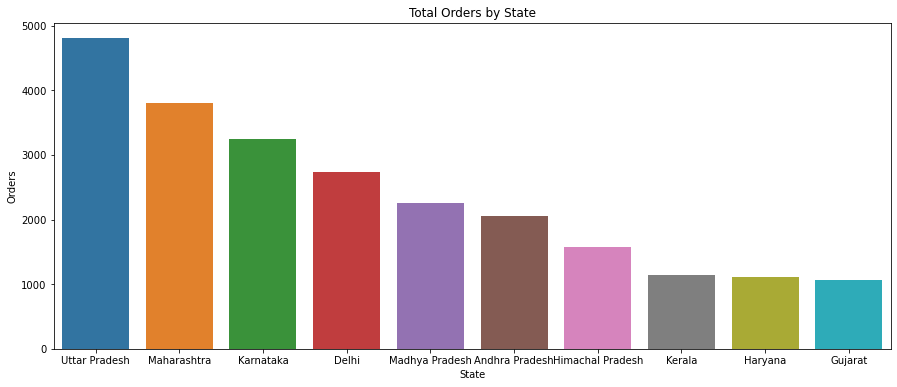

In [22]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

plt.figure(figsize=(15,6))
sns.barplot(x='State',y='Orders', data = sales_state)
plt.title('Total Orders by State')
plt.show()

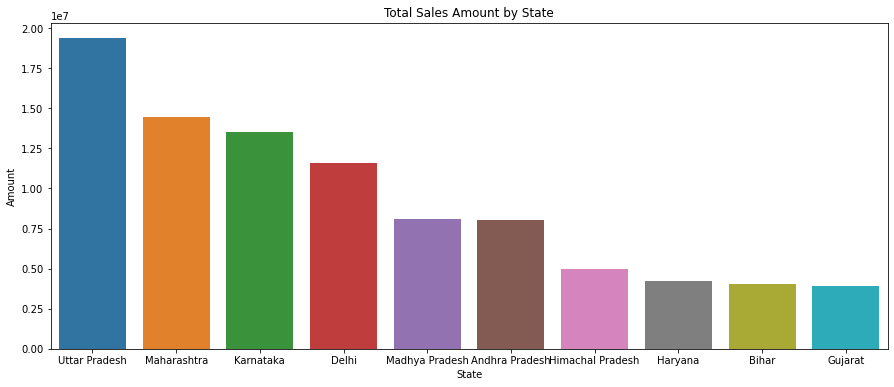

In [23]:
sales_state=df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

plt.figure(figsize=(15,6))
sns.barplot(data = sales_state, x= 'State',y='Amount')
plt.title('Total Sales Amount by State')
plt.show()

### Distribution of Sales by Gender
**conclusion**
- Females have double the sales compared to males

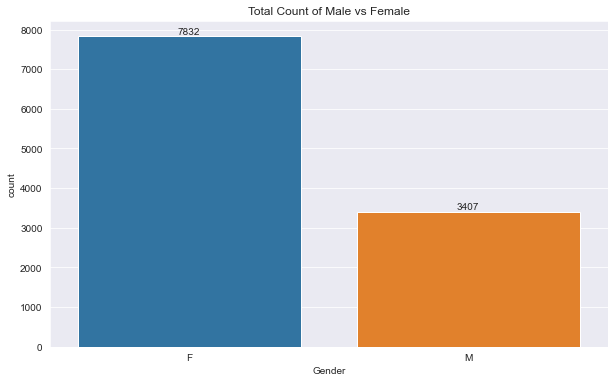

In [24]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
ax = sns.countplot(x='Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total Count of Male vs Female')
plt.show()

In [25]:
# Distribution of Sales by Gender
df.groupby(['Gender'],as_index = False)['Amount'].sum()

,Gender,Amount
0,F,74335853
1,M,31913276


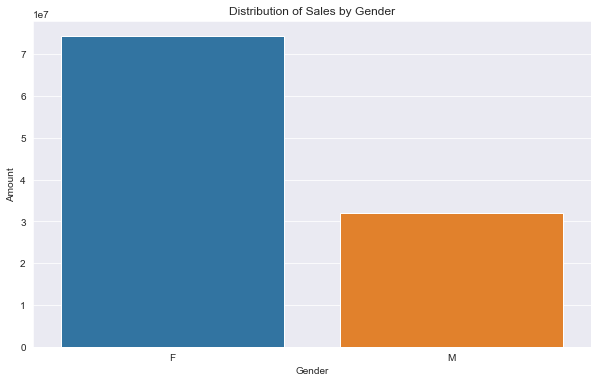

In [26]:
# plotting a bar chart for gender vs total amount
plt.figure(figsize=(10,6))
sales_gender = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x = 'Gender',y='Amount',data = sales_gender)
plt.title('Distribution of Sales by Gender')
plt.show()

### Distribution of Sales by Age Group
**conclusion**
- In the age group of 26-35, there are the most sales

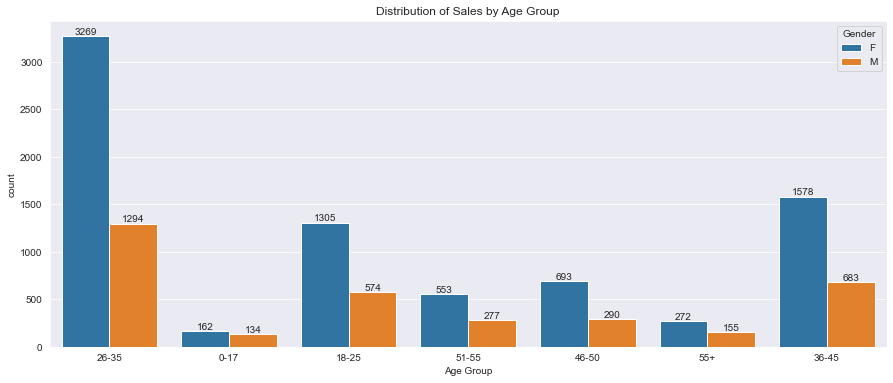

In [27]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Age Group', hue = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Sales by Age Group')
plt.show()

### Total Sales Amount by Age Group

In [28]:
# Age Group vs Total Amount
df.groupby(['Age Group'])['Amount'].sum()

Age Group
0-17      2699653
18-25    17240732
26-35    42852589
36-45    21905847
46-50     9207844
51-55     8261477
55+       4080987
Name: Amount, dtype: int32

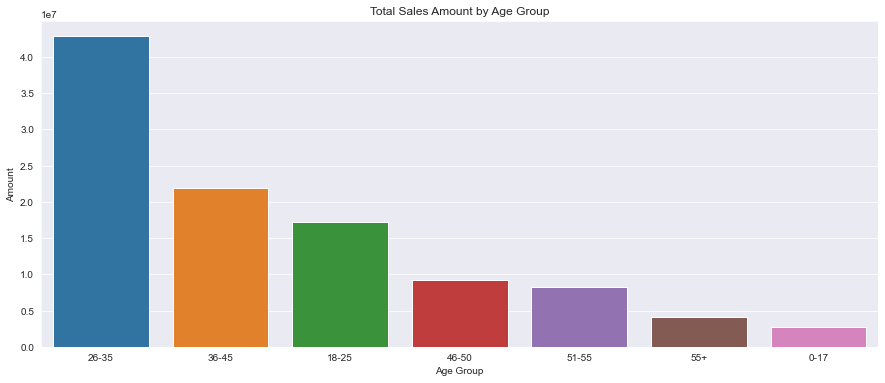

In [29]:
sales_age=df.groupby(['Age Group'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending = False)

plt.figure(figsize=(15,6))
sns.barplot(x='Age Group',y='Amount', data = sales_age)
plt.title('Total Sales Amount by Age Group')
plt.show()

### Distribution and Total Sales by Occupation
**conclusion**
- In the occupation sector, IT, healthcare, and aviation have the most sales.

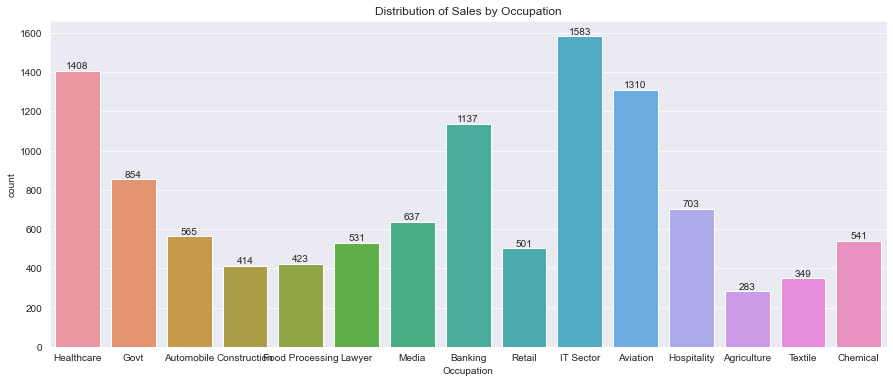

In [30]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Sales by Occupation')
plt.show()

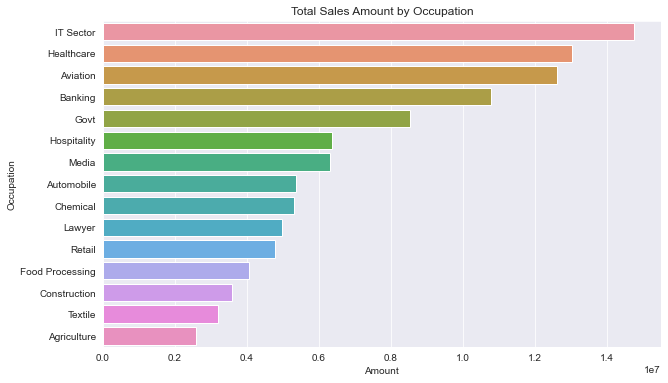

In [31]:
sales_occupation = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(y='Occupation',x='Amount',data = sales_occupation)
plt.title('Total Sales Amount by Occupation')
plt.show()

### Marital Status Distribution of Sales
**conclusion**
- Chevrolet was the top-selling car company most months.

In [32]:
df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum()

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


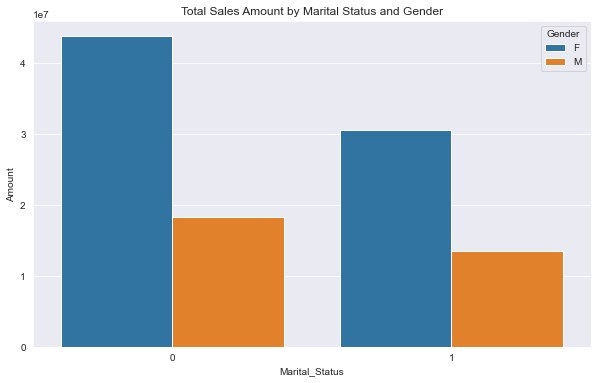

In [33]:
sales_marital_status = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x='Marital_Status',y='Amount', hue='Gender',data = sales_marital_status)
plt.title('Total Sales Amount by Marital Status and Gender')
plt.show()

## Conclusion

- The Diwali Sales Analysis Project offers significant insights into sales performance, customer behavior, and product popularity during the Diwali sales event. Here are the key conclusions drawn from the analysis:

1. Product Category Distribution and Sales: Food products have the highest sales, followed by clothing & apparel, electronics & gadgets, and footwear. This suggests that customers tend to prioritize essential items and gifts during the Diwali festival.

2. State-wise Sales Performance: Uttar Pradesh, Maharashtra, and Karnataka emerge as the top-performing states in terms of both total orders and sales amount. These regions exhibit strong consumer demand and represent lucrative markets for businesses.

3. Gender-based Sales Distribution: Female customers contribute significantly more to sales compared to male customers. This indicates the importance of tailoring marketing strategies and product offerings to better target the preferences of female consumers.

4. Age Group Analysis: The age group of 26-35 shows the highest sales amount, followed by the 36-45 age group. Businesses can focus on these age demographics to maximize sales during the Diwali festival.

5. Occupation-based Sales Insights: IT, healthcare, and aviation sectors witness the highest sales, highlighting potential target industries for marketing campaigns and product promotions.

6. Marital Status Influence on Sales: Married individuals, particularly females, contribute substantially to sales compared to single individuals. Businesses can leverage this insight to design marketing strategies that resonate with married couples and families.